<a href="https://colab.research.google.com/github/bhagath-ac07/machine-learning/blob/main/colab/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the dataset


```
`# This is formatted as code`
```


1.   List item
2.   List item



In [9]:
data_set = pd.read_csv('/content/drive/MyDrive/Position_Salaries.csv')
X = data_set.iloc[:,1:-1].values
y = data_set.iloc[:, -1].values
print(X)
y = y.reshape(-1, 1)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Training the SVR model on the whole dataset

In [10]:
from sklearn.preprocessing import StandardScaler
stand_scalar_x = StandardScaler()
X = stand_scalar_x.fit_transform(X)
stand_scalar_y = StandardScaler()
y = stand_scalar_y.fit_transform(y)
print(X)
print(y)

from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y)


[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [14]:
#transform our input to match feature scaling values
result = regressor.predict(stand_scalar_x.transform([[6.5]]))

#reverse the scale of result which is feature scaled.
print(stand_scalar_y.inverse_transform(result))

[131106.77303274]


## Visualising the SVR results

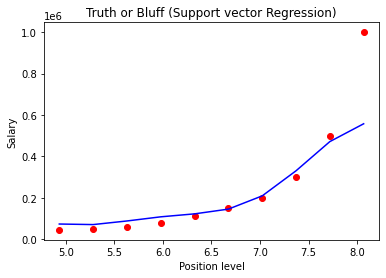

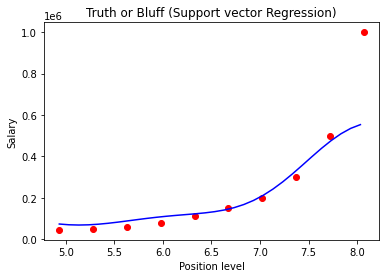

In [19]:
plt.scatter(stand_scalar_x.inverse_transform(X), stand_scalar_y.inverse_transform(y), color = 'red')
plt.plot(stand_scalar_x.inverse_transform(X), stand_scalar_y.inverse_transform(regressor.predict(X)), color = 'blue')
plt.title('Truth or Bluff (Support vector Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()



X_grid = np.arange(min(stand_scalar_x.inverse_transform(X)), max(stand_scalar_x.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(stand_scalar_x.inverse_transform(X), stand_scalar_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, stand_scalar_y.inverse_transform(regressor.predict(stand_scalar_x.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (Support vector Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()